Mean Squared Error: 82010363.05
Root Mean Squared Error: 9055.96
R-squared Score: 0.90

Feature Coefficients:
                  Coefficient
R&D Spend        38102.269270
Administration   -1864.754300
Marketing Spend   3386.175807
State_Florida      447.775725
State_New York       3.272891

Feature Ranges for Reference:
                      min        max
R&D Spend            0.00  165349.20
Administration   51283.14  182645.56
Marketing Spend      0.00  471784.10

Enter values for a new startup to predict its profit:


R&D Spend (0-165349.2):  100000
Administration Spend (51283.14-182645.56):  100000
Marketing Spend (0-471784.1):  300000
State (New York/California/Florida):  California


Error: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values. Please enter valid inputs.


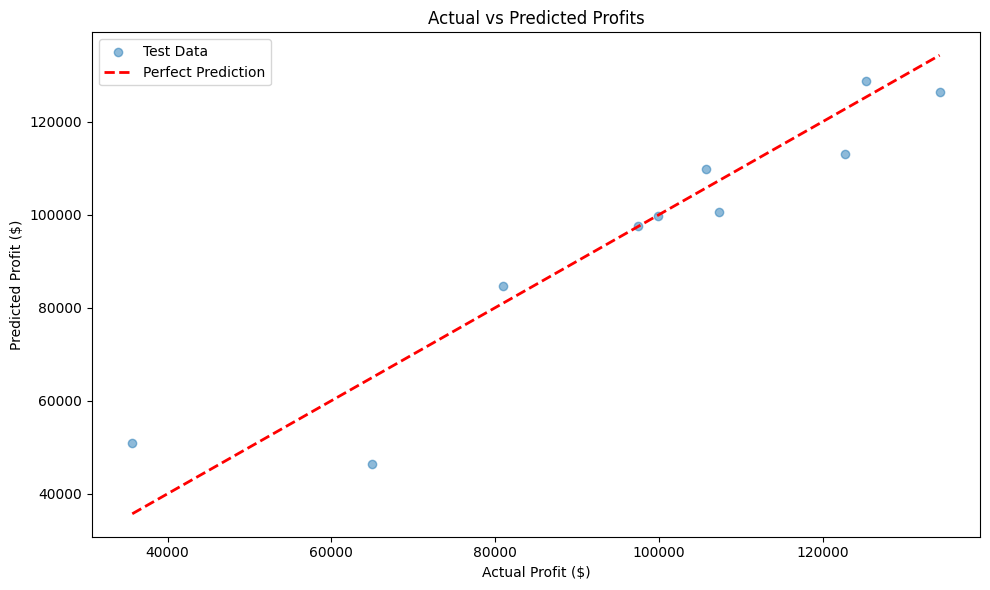

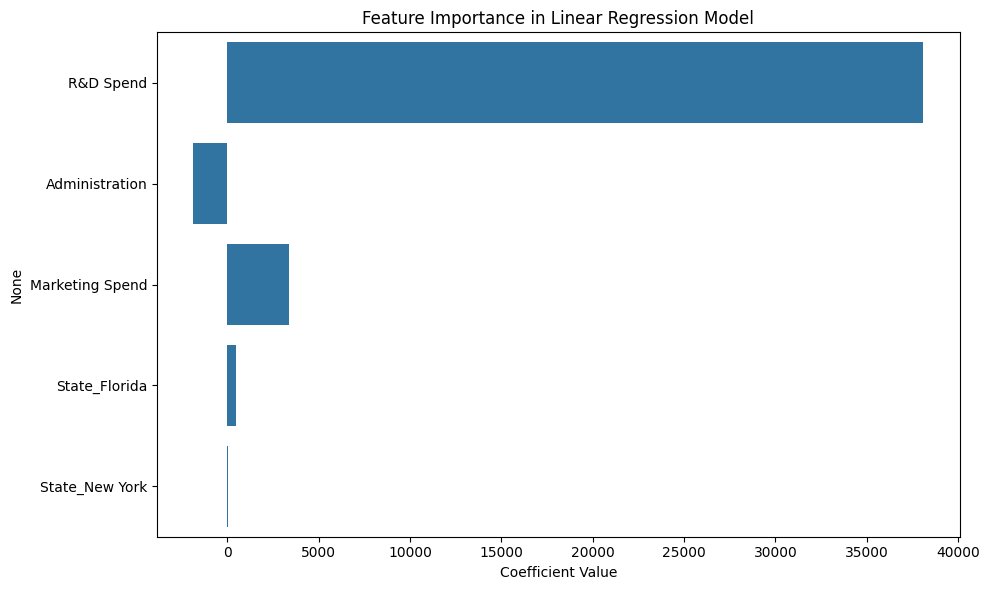

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('50_Startups.csv')


data = pd.get_dummies(data, columns=['State'], drop_first=True)

if data.isnull().any().any():
    print("Error: Missing values in dataset. Please check the CSV file.")
    exit()

X = data.drop('Profit', axis=1)
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

feature_names = X.columns
coefficients = pd.DataFrame(model.coef_, index=feature_names, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

print("\nFeature Ranges for Reference:")
print(X.describe().loc[['min', 'max']].transpose())

print("\nEnter values for a new startup to predict its profit:")
try:
    rd_spend = float(input("R&D Spend (0-165349.2): "))
    administration = float(input("Administration Spend (51283.14-182645.56): "))
    marketing_spend = float(input("Marketing Spend (0-471784.1): "))
    
    state = input("State (New York/California/Florida): ").strip().title()
    
    if state not in ['New York', 'California', 'Florida']:
        raise ValueError("State must be 'New York', 'California', or 'Florida'.")

    if not (0 <= rd_spend <= 165349.2):
        raise ValueError("R&D Spend must be between 0 and 165349.2.")
    if not (51283.14 <= administration <= 182645.56):
        raise ValueError("Administration Spend must be between 51283.14 and 182645.56.")
    if not (0 <= marketing_spend <= 471784.1):
        raise ValueError("Marketing Spend must be between 0 and 471784.1.")

    user_input = pd.DataFrame({
        'R&D Spend': [rd_spend],
        'Administration': [administration],
        'Marketing Spend': [marketing_spend],
        'State_California': [1 if state == 'California' else 0],
        'State_Florida': [1 if state == 'Florida' else 0]
    }, columns=feature_names)  # Ensure columns match X
    
    user_input_scaled = scaler.transform(user_input)
    
    predicted_profit = model.predict(user_input_scaled)[0]
    print(f"\nPredicted Profit: ${predicted_profit:.2f}")

except ValueError as e:
    print(f"Error: {e}. Please enter valid inputs.")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Profit ($)')
plt.ylabel('Predicted Profit ($)')
plt.title('Actual vs Predicted Profits')
plt.legend()
plt.tight_layout()
plt.savefig('actual_vs_predicted_profits.png')
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.savefig('feature_importance50Startups.png')
plt.show()
plt.close()
